In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pdb
import cv2

In [2]:
# optical parameters, unit is meter
zs = 0.01 
pp = 1e-6
Sigma = 1e-3
zf = 2

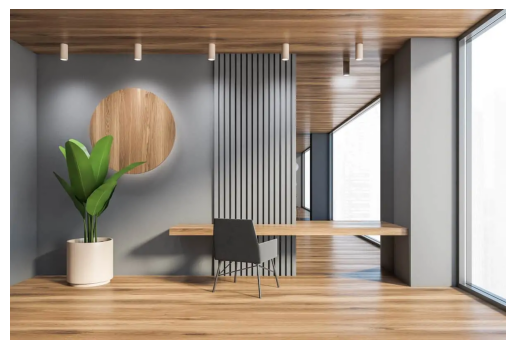

In [3]:
img = cv2.imread('image.webp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

In [11]:
def psf(z):
    sigma = (1/z - 1/zf) * zs / pp * Sigma
    sigma = np.abs(sigma)
    print(z, sigma)
    if sigma < 0.1:
        return np.array([[1]])
    xx, yy = np.meshgrid(np.arange(-3*sigma, 3*sigma+1e-6), np.arange(-3*sigma, 3*sigma+1e-6))
    return np.exp(-(xx**2 + yy**2) / (2 * sigma**2)) / (2 * np.pi * sigma**2)


def psf_set(z):
    drho = 0.01
    drho_LCP = 0.01
    R_RCP_psf = psf(1/(1/z+drho))
    G_RCP_psf = psf(z)
    B_RCP_psf = psf(1/(1/z-drho))

    R_LCP_psf = psf(1/(1/z+drho-drho_LCP))
    G_LCP_psf = psf(1/(1/z-drho_LCP))
    B_LCP_psf = psf(1/(1/z-drho-drho_LCP))

    return [R_RCP_psf, G_RCP_psf, B_RCP_psf, R_LCP_psf, G_LCP_psf, B_LCP_psf]

def visualize_psf_set(z):
    psf_set_img = psf_set(z)
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    for i in range(6):
        ax = axes[i//3, i%3]
        ax.axis('off')
        ax.imshow(psf_set_img[i], cmap='gray')
    plt.show()

def process_img(img, z):
    psf_set_img = psf_set(z)
    img_RCP = np.zeros_like(img)
    img_LCP = np.zeros_like(img)
    for i in range(3):
        img_RCP[:,:,i] = cv2.filter2D(img[:,:,i], -1, psf_set_img[i])
        img_LCP[:,:,i] = cv2.filter2D(img[:,:,i], -1, psf_set_img[i+3])
    img_processed = (img_RCP - img_LCP).astype(np.int8)
    return img_processed, img_RCP, img_LCP


def omit_small_values(img, threshold):
    img[np.abs(img) <= threshold] = 0
    return img

def visualize_processed_img(img, z):
    img_processed, img_RCP, img_LCP = process_img(img, z)
    # img_processed = omit_small_values(img_processed, 0)
    fig = plt.figure(figsize=(30, 12))
    fig.add_subplot(2,1,1)
    plt.axis('off')
    plt.imshow(img_RCP, vmin=0,vmax=16)
    plt.title('Right polarized')
    
    fig.add_subplot(2,1,2)
    plt.axis('off')
    plt.imshow(img_LCP, vmin=0,vmax=16)
    plt.title('Left polarized')

    fig = plt.figure(figsize=(30, 12))
    fig.add_subplot(2,3,1)
    plt.axis('off')
    plt.imshow((img_processed[:,:,0]>0)*img_processed[:,:,0], cmap='Reds',vmin=0,vmax=16)
    plt.title('Red Positive')
    
    fig.add_subplot(2,3,2)
    plt.axis('off')
    plt.imshow((img_processed[:,:,1]>0)*img_processed[:,:,1], cmap='Greens',vmin=0,vmax=16)
    plt.title('Green Positive')

    fig.add_subplot(2,3,3)
    plt.axis('off')
    plt.imshow((img_processed[:,:,2]>0)*img_processed[:,:,2], cmap='Blues',vmin=0,vmax=16)
    plt.title('Blue Positive')

    fig.add_subplot(2,3,4)
    plt.axis('off')
    plt.imshow((img_processed[:,:,0]<0)*-img_processed[:,:,0], cmap='Reds', vmin=0, vmax=16)
    plt.title('Red Negative')

    fig.add_subplot(2,3,5)
    plt.axis('off')
    plt.imshow((img_processed[:,:,1]<0)*-img_processed[:,:,1], cmap='Greens', vmin=0, vmax=16)
    plt.title('Green Negative')

    fig.add_subplot(2,3,6)
    plt.axis('off')
    plt.imshow((img_processed[:,:,2]<0)*-img_processed[:,:,2], cmap='Blues', vmin=0, vmax=16) 
    plt.title('Blue Negative')

    return img_processed

3.846153846153846 2.4
4 2.5
4.166666666666667 2.6000000000000005
4.0 2.5
4.166666666666667 2.6000000000000005
4.347826086956522 2.7000000000000006


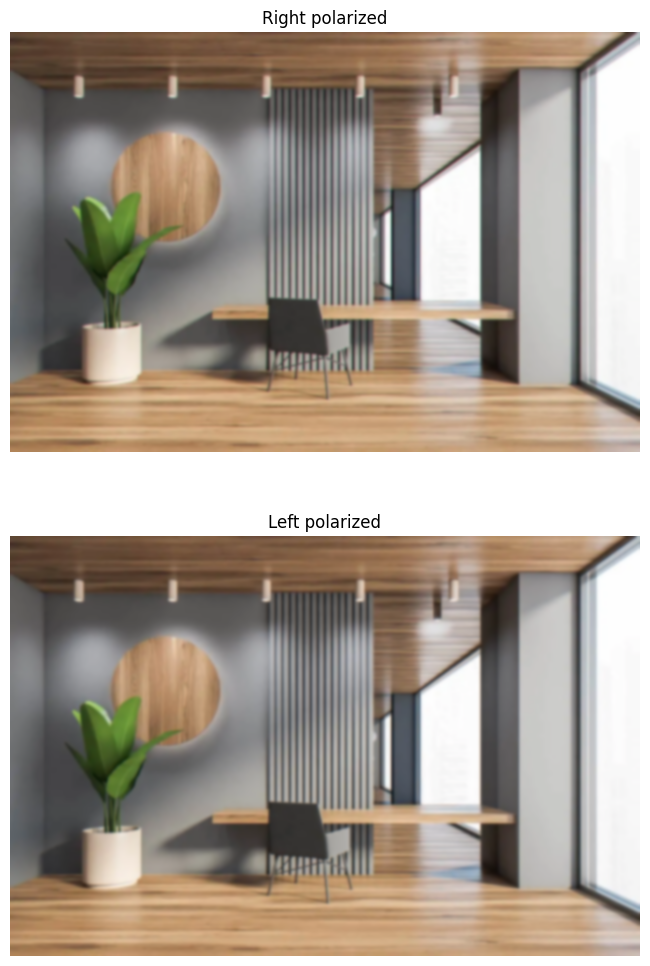

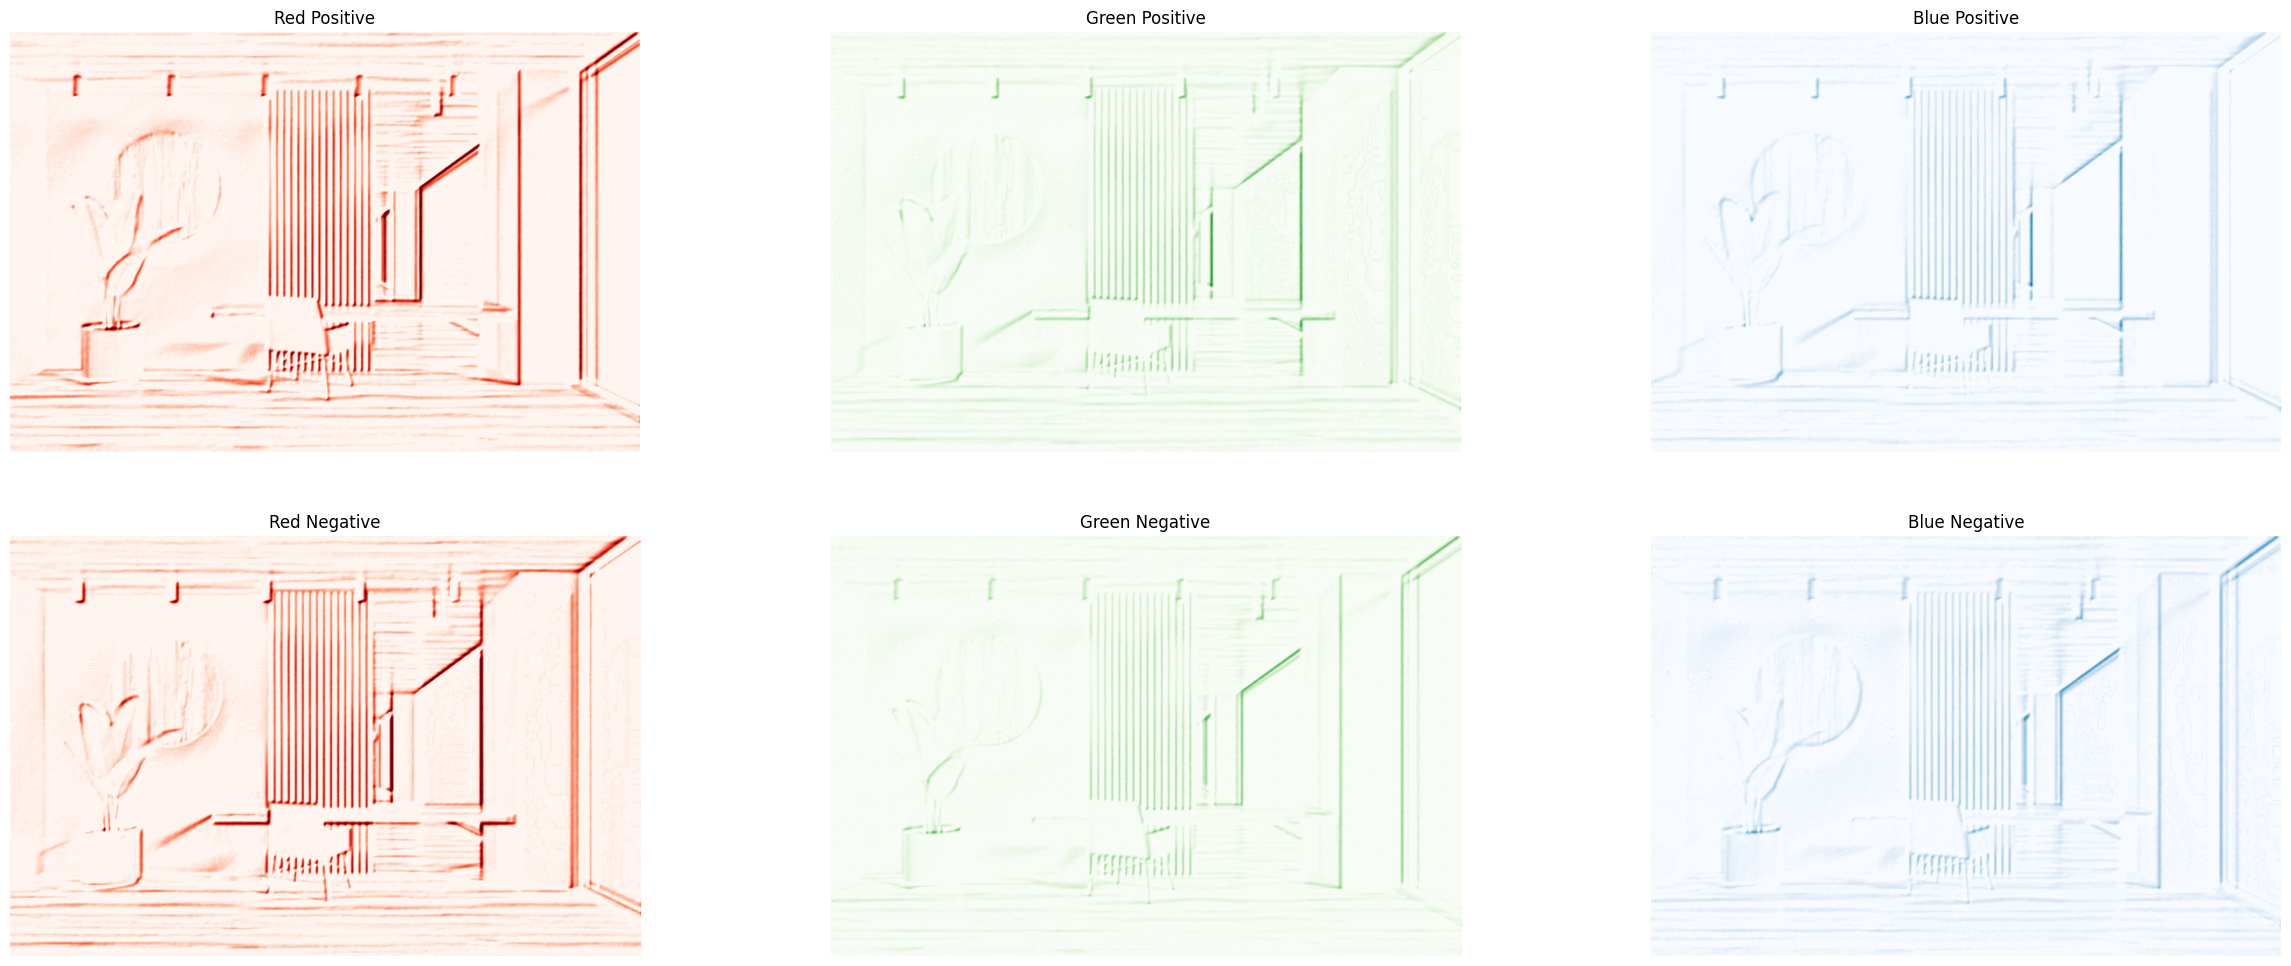

In [12]:
img_processed = visualize_processed_img(img, 4)


In [151]:
img_processed

array([[[-1,  0,  0],
        [-1,  0,  0],
        [-1,  0,  0],
        ...,
        [ 3, -1, -1],
        [ 1,  0, -1],
        [ 1,  0,  1]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 3, -1, -1],
        [ 1, -1, -1],
        [ 1,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0, -1],
        ...,
        [ 2, -1, -1],
        [ 2,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0, -1],
        [ 0,  0, -1],
        [ 0,  0, -1],
        ...,
        [ 0,  0,  0],
        [ 0,  0, -1],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  1,  0],
        [ 0,  1,  0],
        [ 0,  0,  0]],

       [[ 0,  1,  0],
        [ 0,  1,  0],
        [ 0,  1,  0],
        ...,
        [ 0,  1,  0],
        [ 0,  1, -1],
        [ 0,  1,  0]]], dtype=int8)

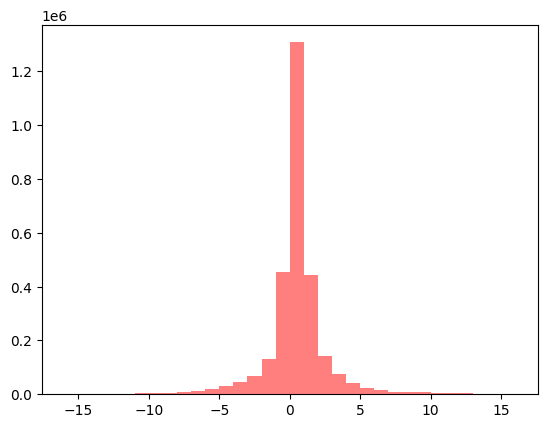

In [6]:
density = plt.hist(img_processed.flatten(), bins=32, range=[-16, 16], color='r', alpha=0.5)

In [153]:
np.sum(density[0]) / img_processed.flatten().size

0.9989083333333333

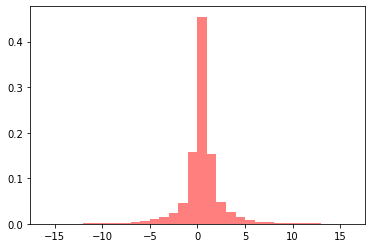

In [154]:
density = plt.hist(img_processed.flatten(), bins=32, range=[-16, 16], color='r', alpha=0.5, density=True)